In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats

from warnings import filterwarnings
filterwarnings("ignore")

In [124]:
df = pd.read_csv("Holiday_Package.csv")
new = df.drop("Unnamed: 0" , axis=1)

In [125]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [126]:
new.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [128]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [129]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,NaN,NaN,NaN,436.5,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
new.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [131]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [132]:
dups = df.duplicated()
print(dups.sum())

0


In [133]:
df.shape

(872, 8)

In [134]:
df.select_dtypes(include='object').head()

,Holliday_Package,foreign
0,no,no
1,yes,no
2,no,no
3,no,no
4,no,no


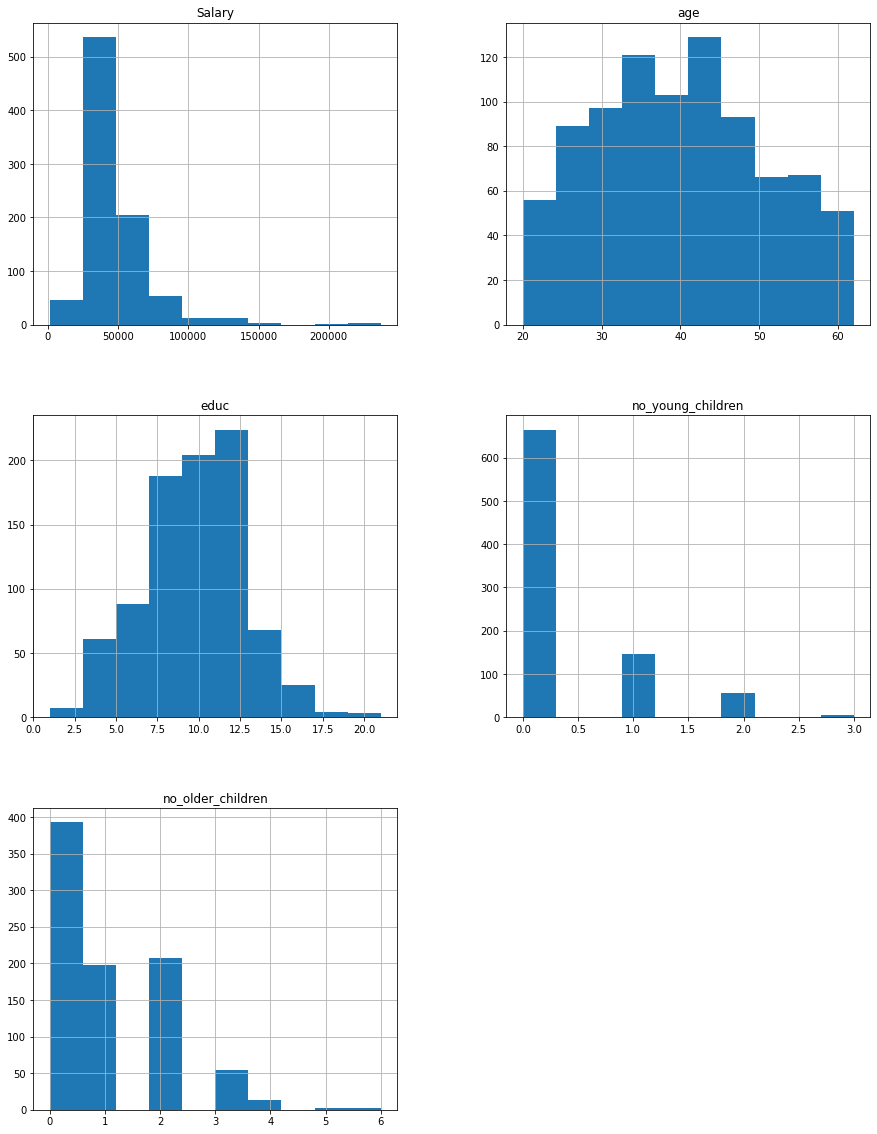

In [135]:
#Univariate analysis

new.hist(figsize=(15,20));

In [136]:
# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(new.Salary),stats.skew(new.age),
                                       stats.skew(new.educ),stats.skew(new.no_young_children),
                                       stats.skew(new.no_older_children)]},
                        index=['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'])  

Skewness

,Skewness
Salary,3.097875
age,0.146160
educ,-0.045423
no_young_children,1.943165
no_older_children,0.952310


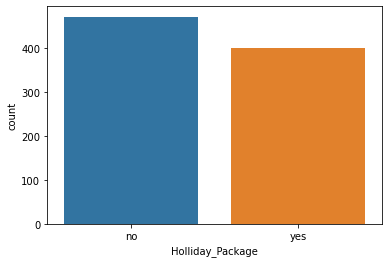

In [137]:
sns.countplot(df['Holliday_Package']);

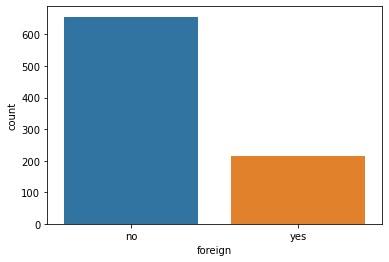

In [138]:
sns.countplot(df['foreign']);

In [139]:
df.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

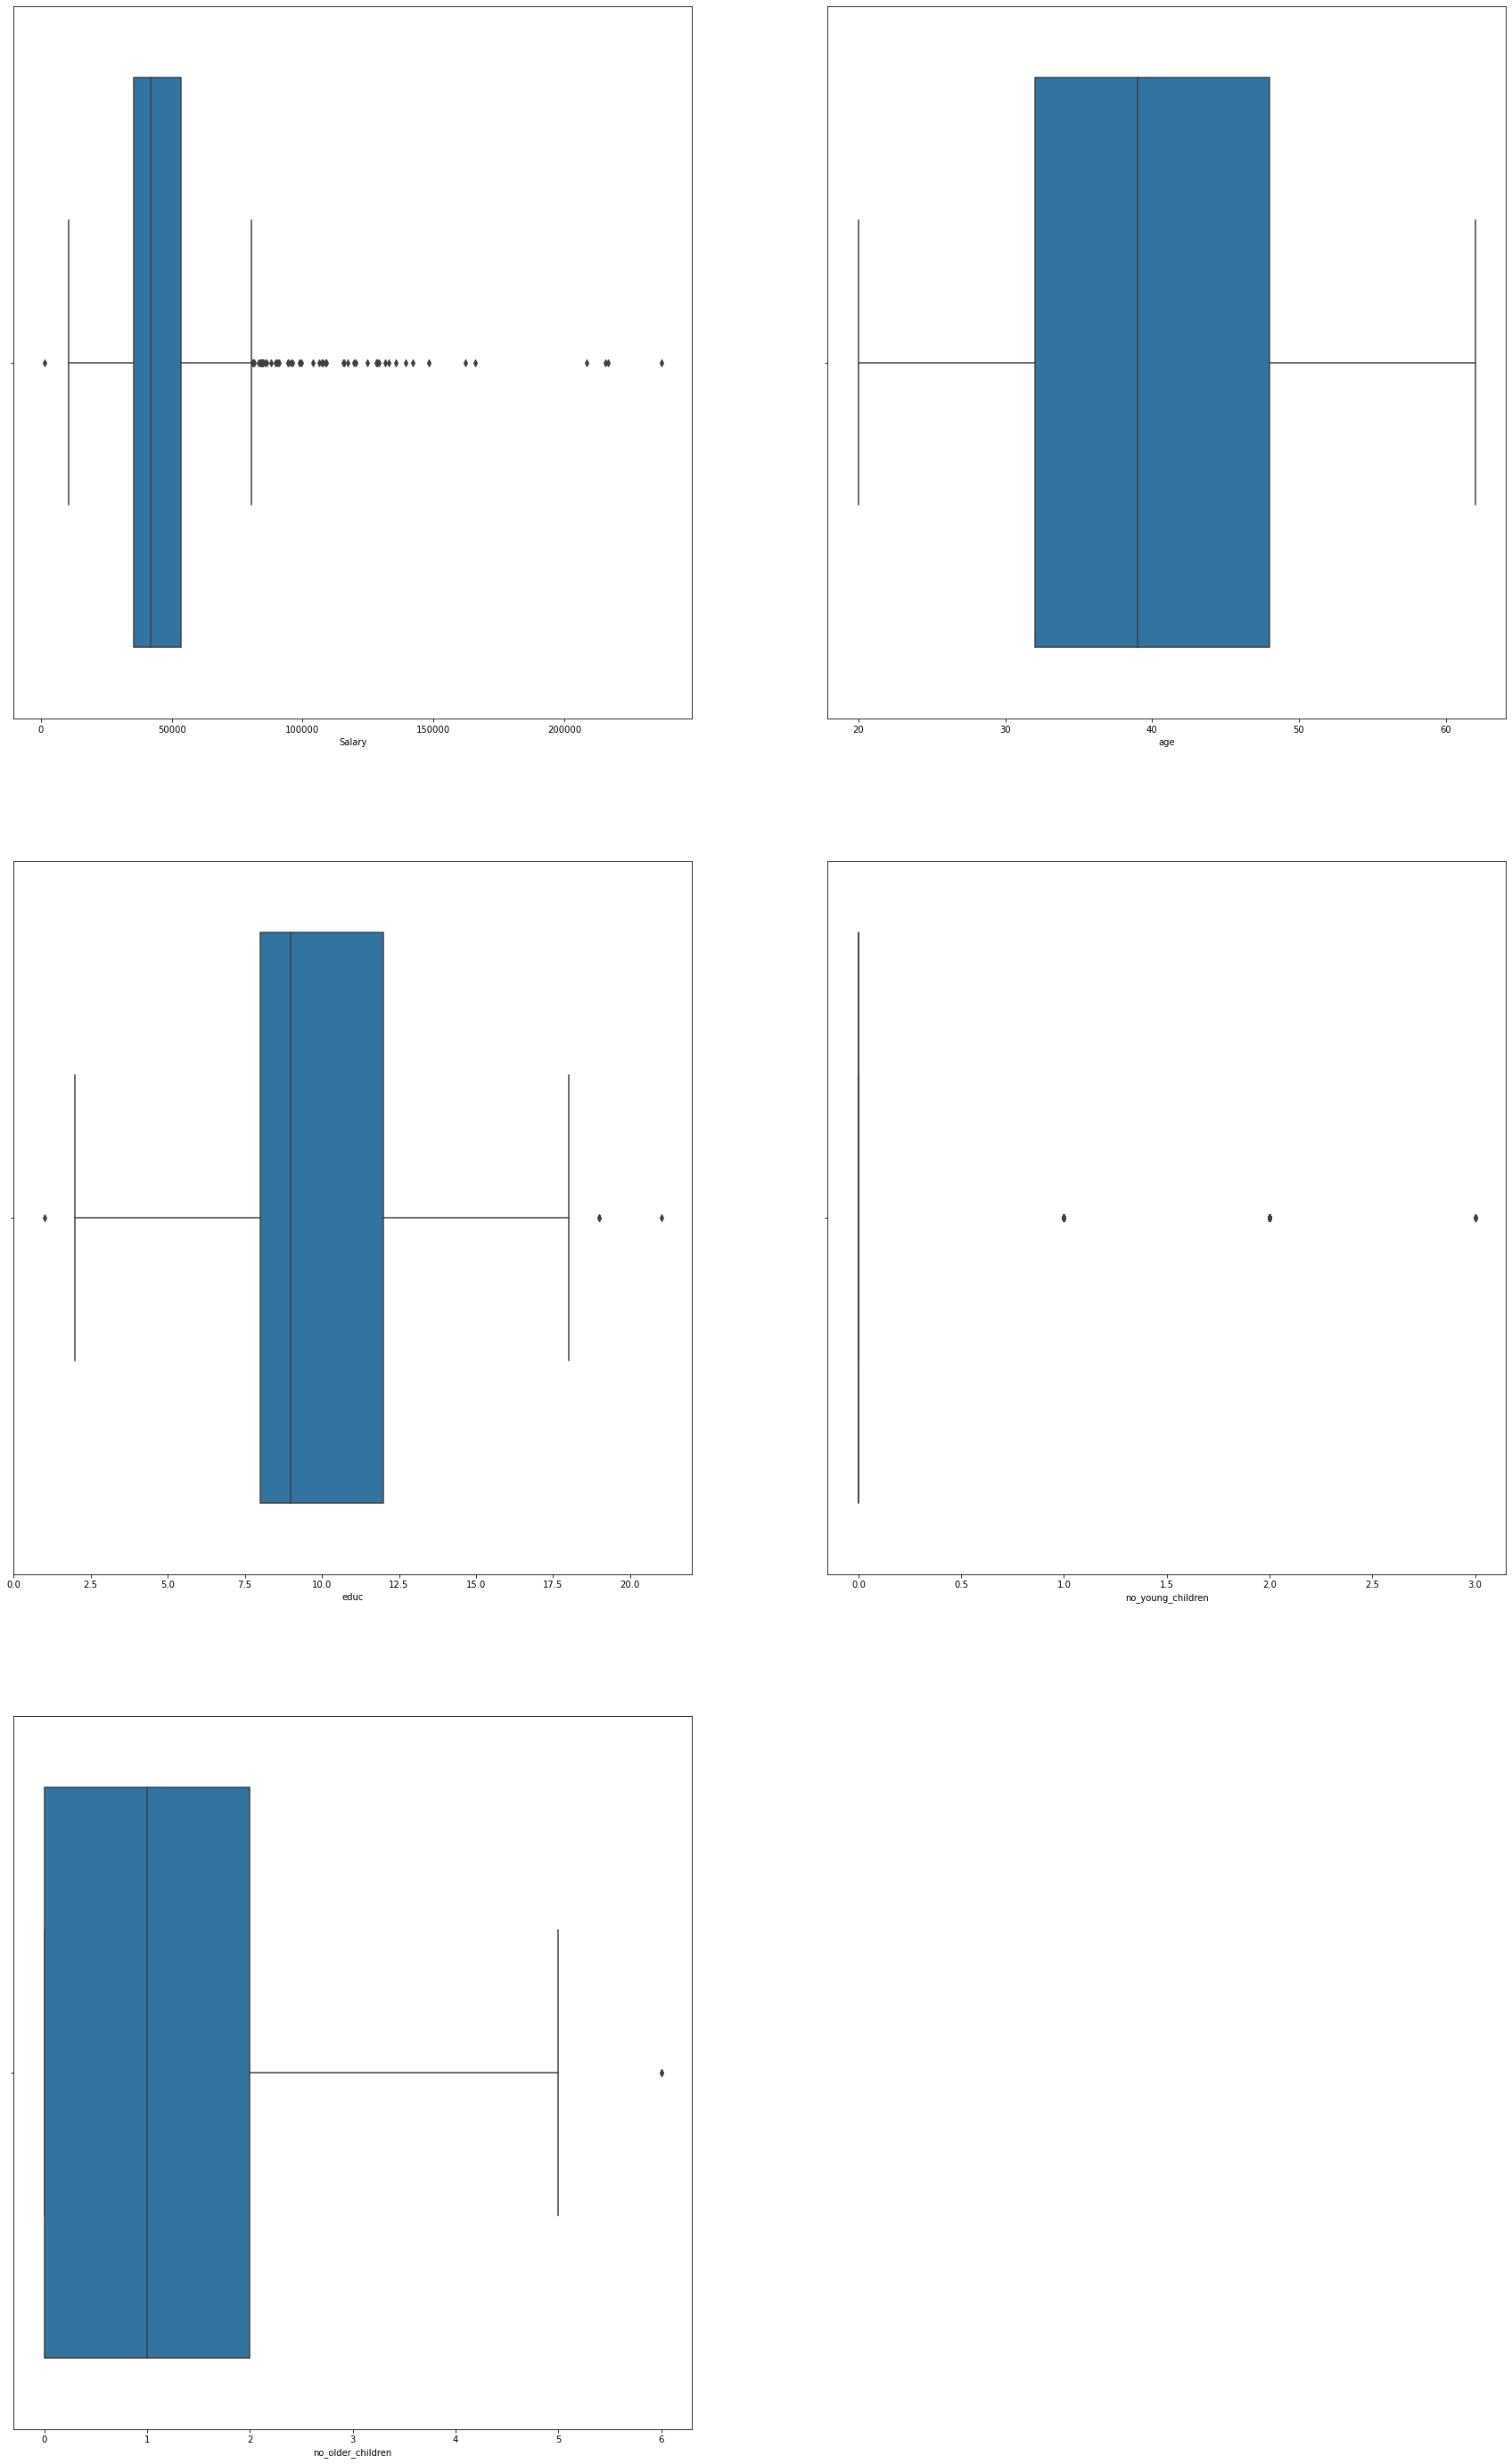

In [140]:
plt.figure(figsize=(30,50))

My_coulmns = ['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']
for i in range(0,5):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[My_coulmns[i]])

<AxesSubplot:>

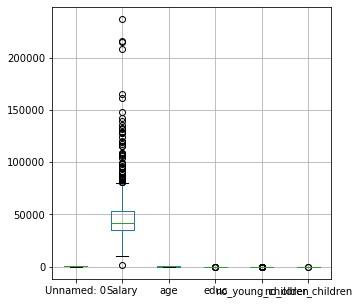

In [141]:
#To check for outliers

df.boxplot(figsize=(5,5))

In [142]:
##Treating outliers

def treat_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    
    return lower_range,upper_range

In [143]:
for column in df.drop(['Holliday_Package','foreign','no_young_children','no_older_children','educ'],axis=1):
    lr, ur = treat_outlier(df[column])
    df[column] = np.where(df[column]>ur,ur,df[column])
    df[column] = np.where(df[column]<lr,lr,df[column])

In [144]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [145]:
dft = df[~((df<(Q1 - 1.5 * IQR))|(df>(Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape of data with outlier treatment",dft.shape)
print("Shape of data without outlier treatment",df.shape)

Shape of data with outlier treatment (661, 8)
Shape of data without outlier treatment (872, 8)


<AxesSubplot:>

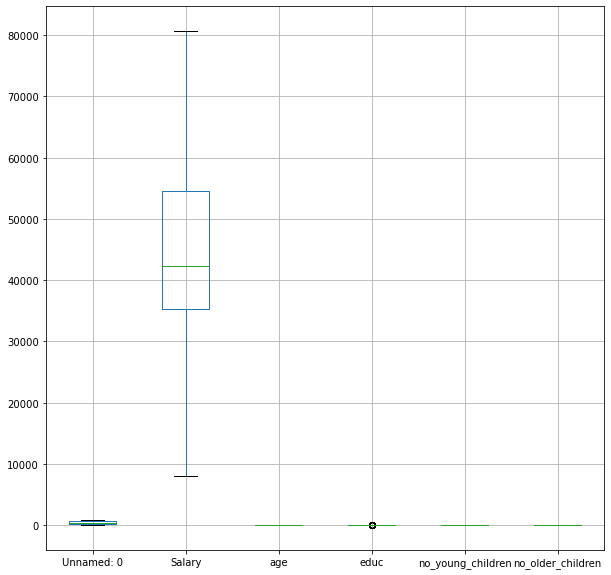

In [146]:
dft.boxplot(figsize = (10,10))

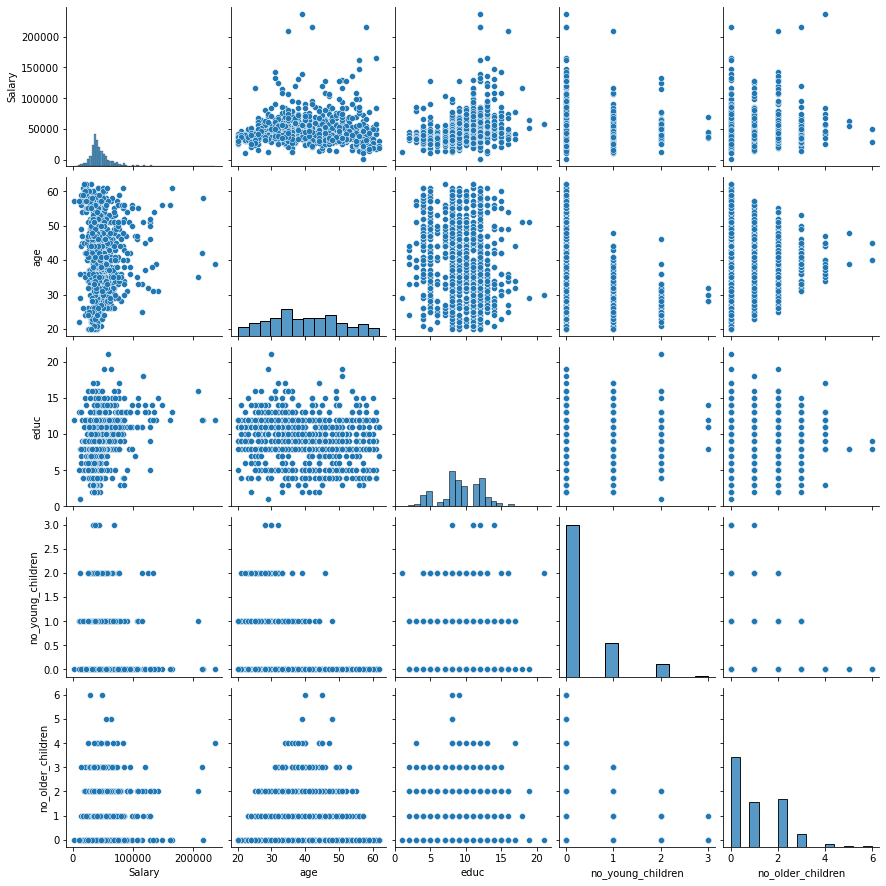

In [147]:
sns.pairplot(data=new)
plt.show()

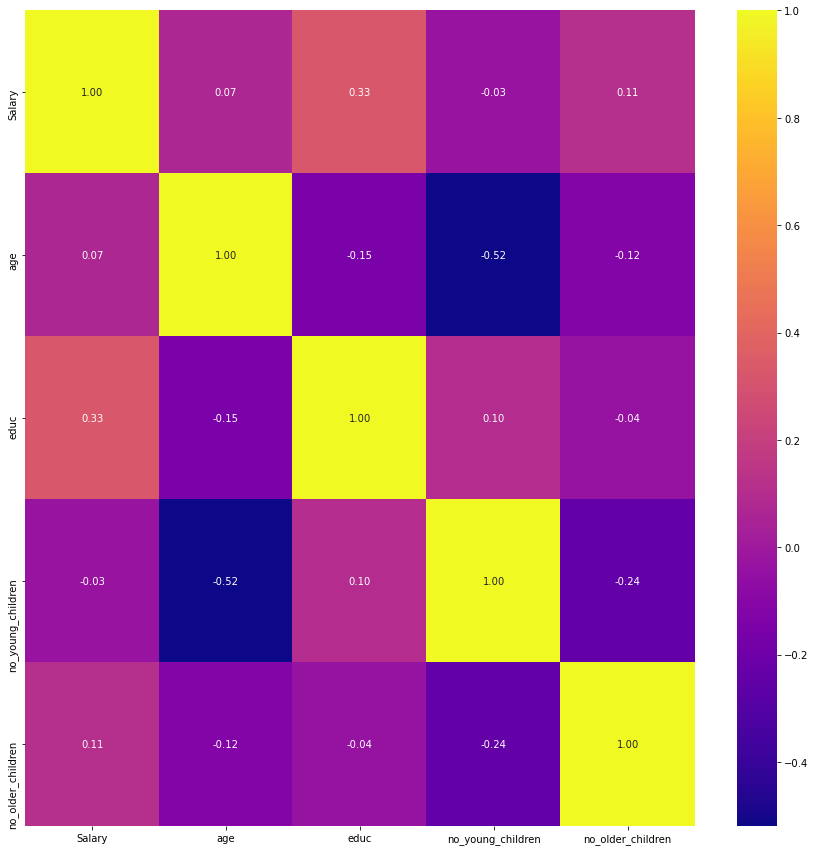

In [148]:
plt.figure(figsize=(15,15))
sns.heatmap(new.corr(),annot=True,fmt=".2f", cmap='plasma');

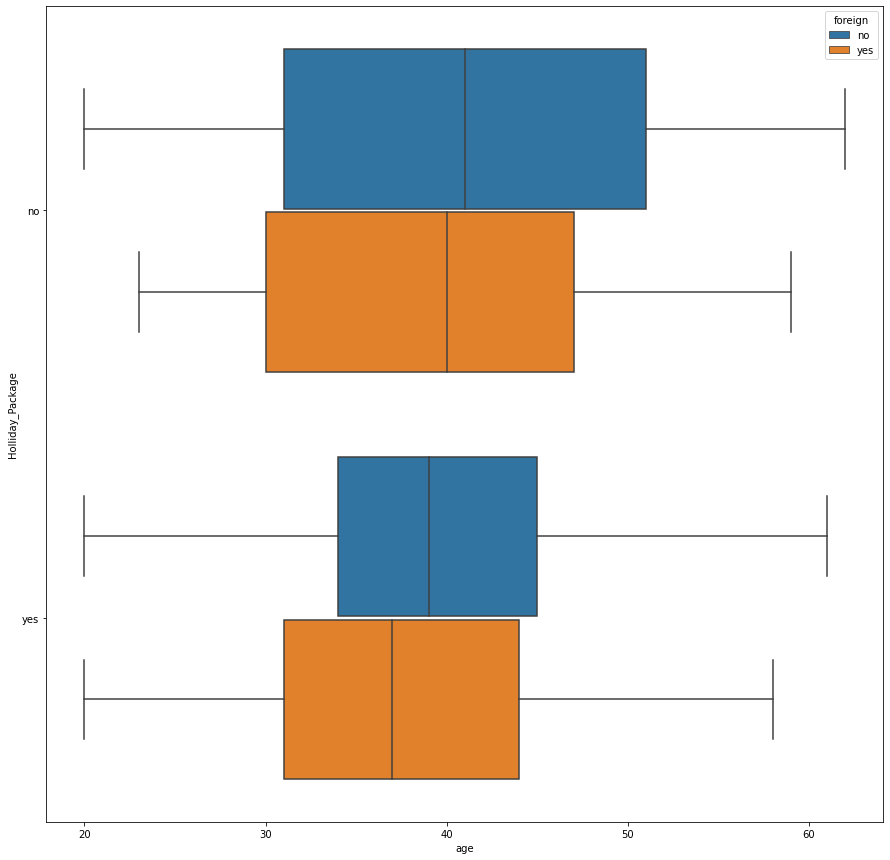

In [149]:
plt.figure(figsize=(15,15))
sns.boxplot(df['age'], df['Holliday_Package'], hue=df['foreign']);

In [150]:
df.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [151]:
df = dft.copy()

In [153]:
df.shape

(661, 8)

In [154]:
df = df.drop('Unnamed: 0',axis=1)

In [155]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,yes,37207.00,45.0,8,0,1,no
2,no,58022.00,46.0,9,0,0,no
4,no,66734.00,44.0,12,0,2,no
5,yes,61590.00,42.0,12,0,1,no
6,no,80687.75,51.0,8,0,0,no


In [157]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes

In [158]:
df.describe()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,661.000000,661.000000,661.000000,661.000000,661.0,661.000000,661.000000
mean,0.509834,45961.313162,43.308623,9.116490,0.0,1.099849,0.229955
std,0.500282,16106.368986,9.487395,2.925859,0.0,1.106051,0.421122
min,0.000000,8105.750000,20.000000,2.000000,0.0,0.000000,0.000000
25%,0.000000,35302.000000,36.000000,8.000000,0.0,0.000000,0.000000
50%,1.000000,42369.000000,43.000000,9.000000,0.0,1.000000,0.000000
75%,1.000000,54626.000000,50.000000,11.000000,0.0,2.000000,0.000000
max,1.000000,80687.750000,62.000000,18.000000,0.0,5.000000,1.000000


In [159]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,1,37207.00,45.0,8,0,1,0
2,0,58022.00,46.0,9,0,0,0
4,0,66734.00,44.0,12,0,2,0
5,1,61590.00,42.0,12,0,1,0
6,0,80687.75,51.0,8,0,0,0


array([[<AxesSubplot:title={'center':'Holliday_Package'}>,
        <AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'educ'}>,
        <AxesSubplot:title={'center':'no_young_children'}>,
        <AxesSubplot:title={'center':'no_older_children'}>],
       [<AxesSubplot:title={'center':'foreign'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

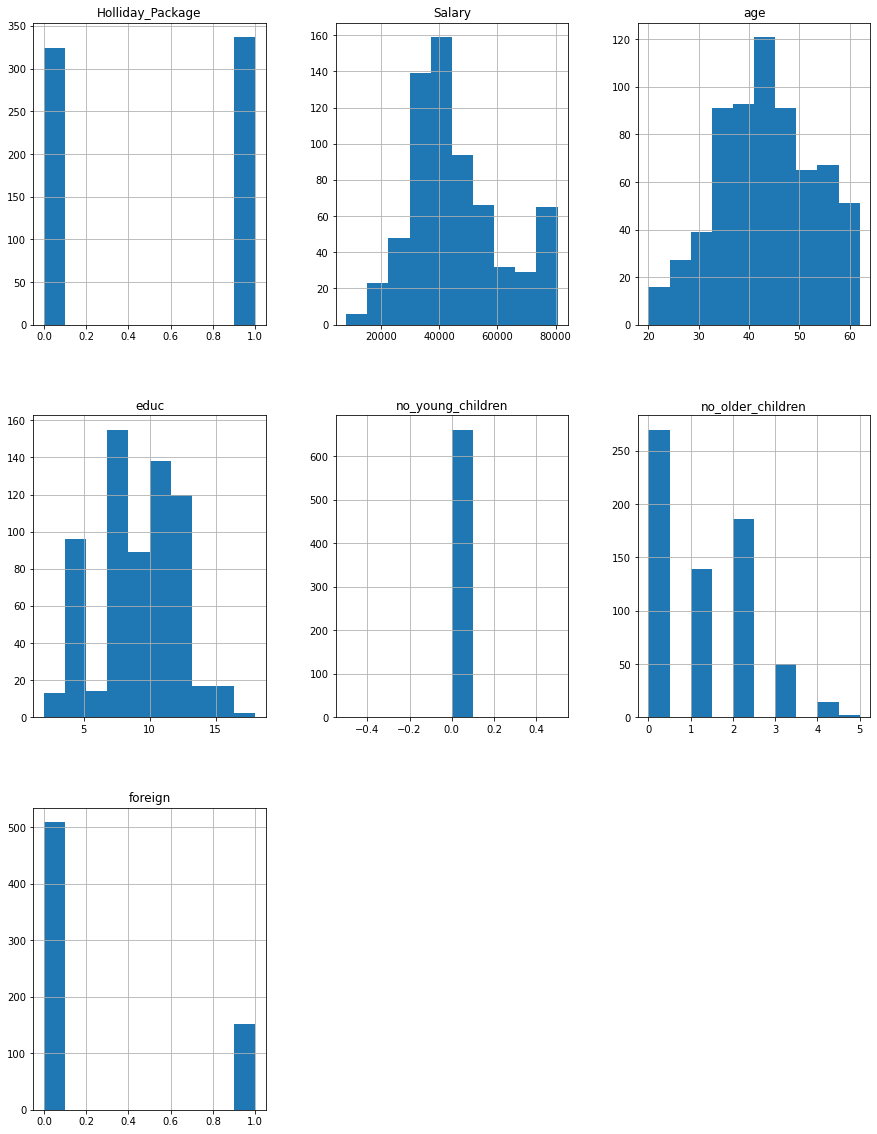

In [160]:
df.hist(figsize=(15,20))

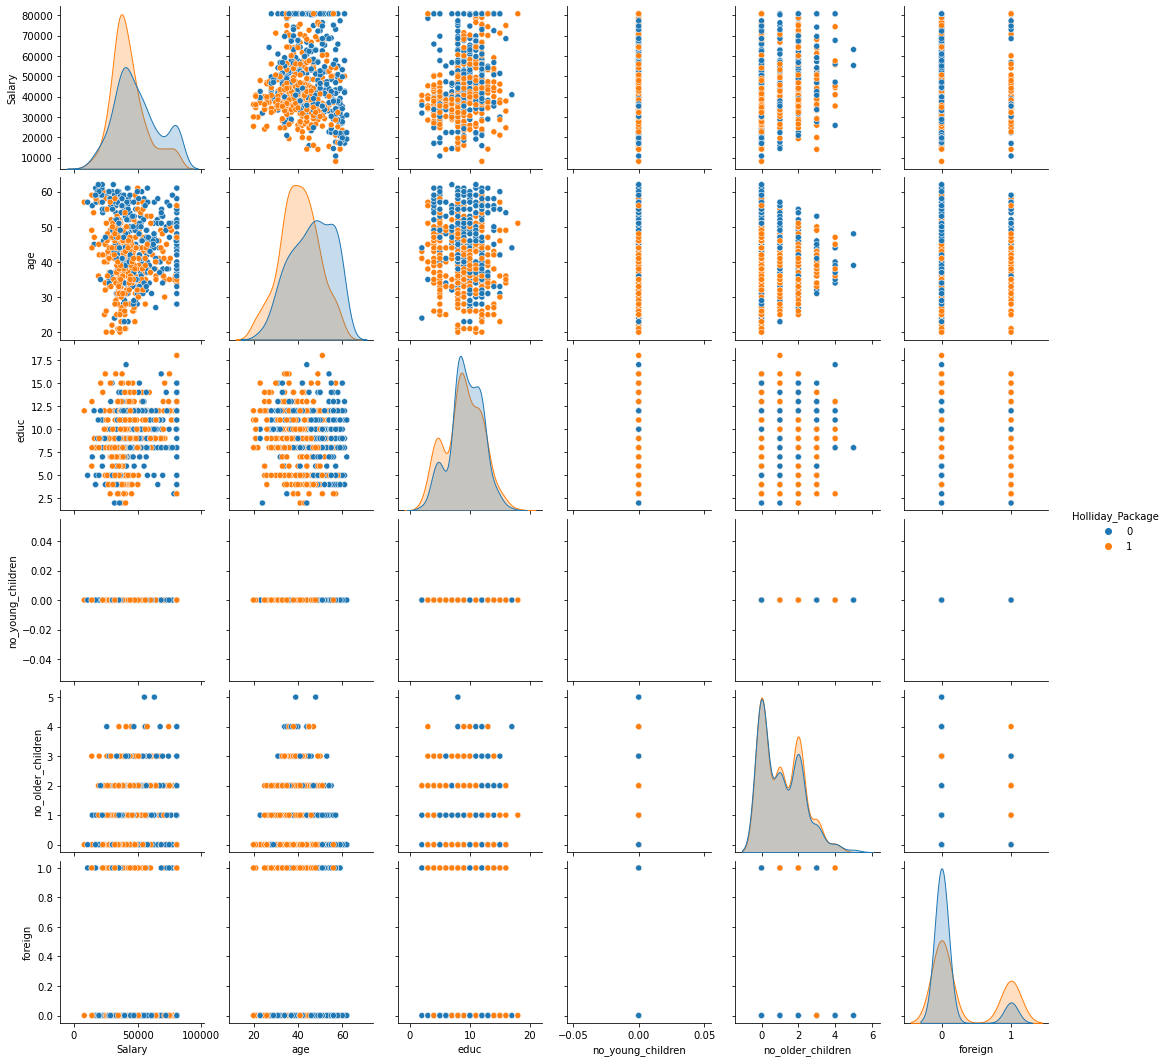

In [161]:
sns.pairplot(df,hue='Holliday_Package',diag_kind='kde')

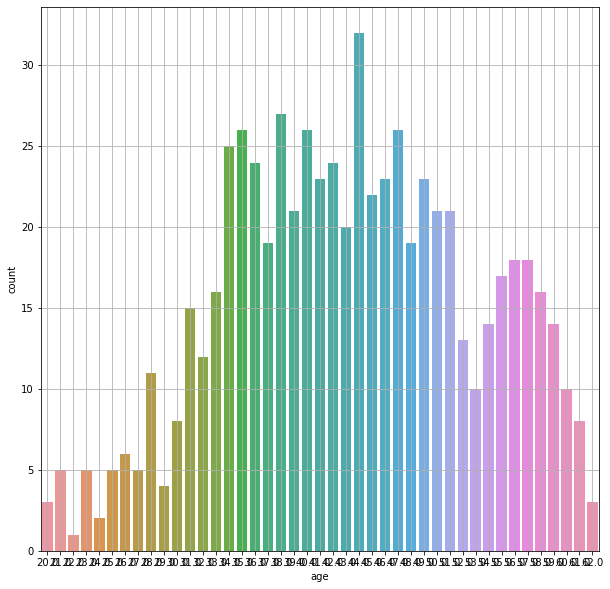

In [162]:
plt.figure(figsize=(10,10))
sns.countplot(df.age)
plt.grid();
plt.show();

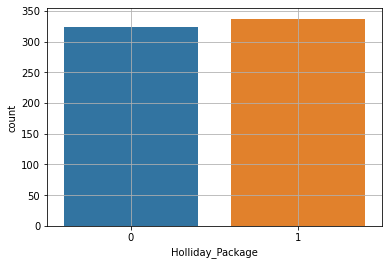

In [163]:
sns.countplot(df.Holliday_Package)
plt.grid();
plt.show();

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

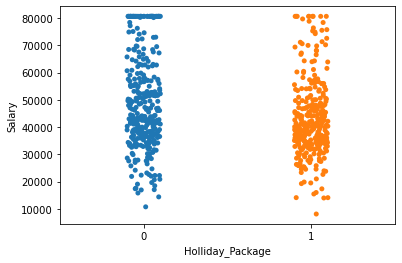

In [164]:
sns.stripplot(df.Holliday_Package,df.Salary)

In [165]:
##Logistic Regression

# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package',axis = 1)

# Copy target into the y dataframe. 
y = df['Holliday_Package']


In [166]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,random_state = 1, stratify = y)


In [167]:
y_train.value_counts(1)

1    0.510823
0    0.489177
Name: Holliday_Package, dtype: float64

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [169]:
# Fit the Logistic Regression model
#?LogisticRegression

model = LogisticRegression(solver = 'newton-cg',max_iter = 10000, penalty = 'none', verbose = True, n_jobs= 2 )
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [170]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [171]:
y_train_predict_prob = model.predict_proba(X_test)
pd.DataFrame(y_train_predict_prob).head()

,0,1
0,0.448017,0.551983
1,0.713683,0.286317
2,0.682261,0.317739
3,0.614232,0.385768
4,0.471152,0.528848


In [172]:
# Accuracy - Training Data
model.score(X_train,y_train)

0.6623376623376623

AUC: 0.753


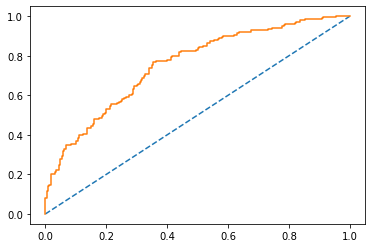

In [173]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [174]:
# Accuracy - Test Data
model.score(X_test,y_test)

0.628140703517588

AUC: 0.701


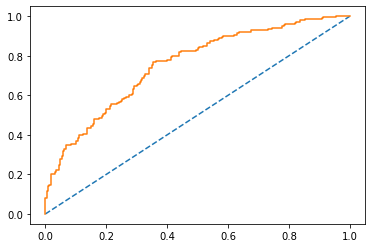

In [175]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [177]:
confusion_matrix(y_train, y_train_predict)

array([[161,  65],
       [ 91, 145]])

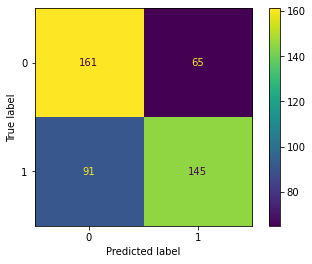

In [178]:
plot_confusion_matrix(model,X_train, y_train)

In [179]:
    print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       226
           1       0.69      0.61      0.65       236

    accuracy                           0.66       462
   macro avg       0.66      0.66      0.66       462
weighted avg       0.67      0.66      0.66       462



In [180]:
confusion_matrix(y_test, y_test_predict)

array([[65, 33],
       [41, 60]])

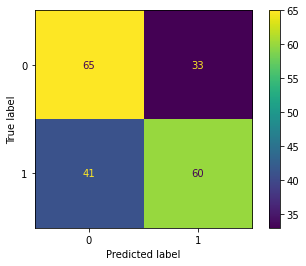

In [181]:
plot_confusion_matrix(model,X_test, y_test)

In [182]:
    print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64        98
           1       0.65      0.59      0.62       101

    accuracy                           0.63       199
   macro avg       0.63      0.63      0.63       199
weighted avg       0.63      0.63      0.63       199



In [183]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [184]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [185]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [186]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [187]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [188]:
best_model = grid_search.best_estimator_

In [189]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [190]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.611198,0.388802
1,0.571086,0.428914
2,0.518259,0.481741
3,0.468862,0.531138
4,0.592625,0.407375


              precision    recall  f1-score   support

           0       0.55      0.64      0.59       226
           1       0.59      0.51      0.55       236

    accuracy                           0.57       462
   macro avg       0.57      0.57      0.57       462
weighted avg       0.57      0.57      0.57       462
 



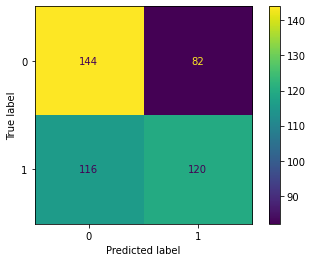

In [191]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.53      0.60      0.56        98
           1       0.56      0.49      0.52       101

    accuracy                           0.54       199
   macro avg       0.54      0.54      0.54       199
weighted avg       0.54      0.54      0.54       199
 



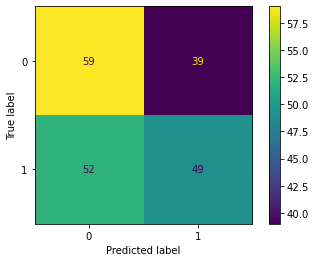

In [192]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

# -----------------------------------------------------------------------------

In [193]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [194]:
##Linear Discriminant Anaylsis

# Creating a copy of the original data frame

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.30,random_state=1,stratify = y)

print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (462, 6)
Number of rows and columns of the training set for the dependent variable: (462,)
Number of rows and columns of the test set for the independent variables: (199, 6)
Number of rows and columns of the test set for the dependent variable: (199,)


In [195]:
#Build LDA Model
#?LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)
#?clf.decision_function #-----
posterior = clf.decision_function(X_train)
print(posterior)
print(np.exp(posterior))

[ 1.96390911e+00 -5.66307053e-01  6.25447000e-01  1.99584848e+00
  7.38930353e-01 -3.91775528e-01  8.52706097e-02 -1.47306080e+00
 -1.66886781e+00 -1.03234868e+00 -1.68455401e-01 -1.74433150e-01
 -1.11664948e+00 -5.12927911e-01 -4.12690645e-01 -3.83634263e-01
 -6.02244916e-01  4.66520290e-01 -1.17338549e+00  2.06389989e+00
  1.35356107e-01 -1.17339461e+00 -6.39697059e-01 -1.20507900e+00
  5.69006050e-01 -3.48105352e-01 -5.54559558e-01  2.28673833e-01
 -2.16550626e-01  3.14932410e-01  1.01173526e+00  3.77024584e-01
  1.19816680e+00 -1.06594561e+00 -1.82312613e+00 -2.36878456e-01
  1.58687744e+00 -1.90468332e+00  2.27314533e+00  2.25576299e+00
  1.21326458e-01  3.68413849e-01  9.33024335e-01 -5.13132730e-01
  1.79649641e+00 -8.88225869e-01 -1.13080105e-01 -2.26006937e-01
 -7.65340496e-01 -1.37749611e+00  8.05373286e-01 -3.69771631e-01
 -9.58549603e-01 -2.15824389e-01  6.14033372e-01  3.33481992e-01
  4.13189760e-01  4.71562318e-01  2.48930361e+00  7.02063260e-02
 -1.06925830e+00 -3.52535

In [196]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

print(pred_class_test)

[1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1
 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1
 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 0]


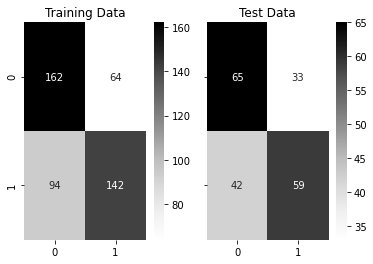

In [197]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [198]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.72      0.67       226
           1       0.69      0.60      0.64       236

    accuracy                           0.66       462
   macro avg       0.66      0.66      0.66       462
weighted avg       0.66      0.66      0.66       462
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.61      0.66      0.63        98
           1       0.64      0.58      0.61       101

    accuracy                           0.62       199
   macro avg       0.62      0.62      0.62       199
weighted avg       0.62      0.62      0.62       199
 



In [199]:
# Training Data Probability Prediction
?model.predict_proba

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.753


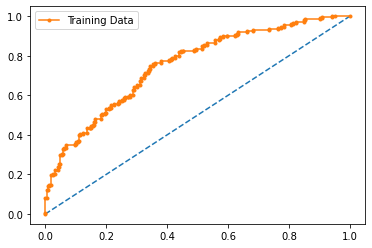

In [209]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data');


# show the plot
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.701


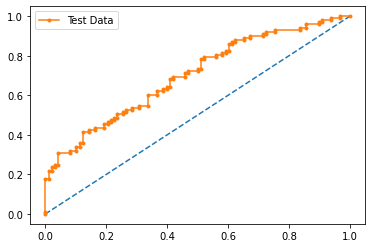

In [208]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data');

# show the plot
plt.legend(loc='best')
plt.show()


0.1 

Accuracy Score 0.5108
F1 Score 0.6762 

Confusion Matrix


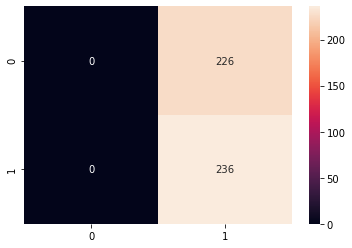

0.2 

Accuracy Score 0.5563
F1 Score 0.6945 

Confusion Matrix


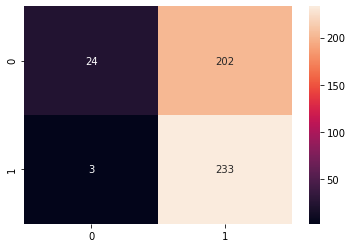

0.3 

Accuracy Score 0.6364
F1 Score 0.7219 

Confusion Matrix


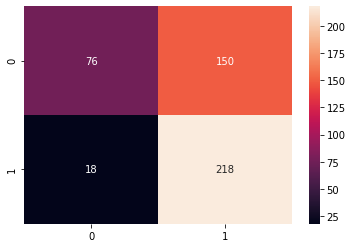

0.4 

Accuracy Score 0.6861
F1 Score 0.7184 

Confusion Matrix


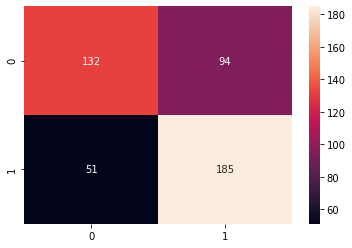

0.5 

Accuracy Score 0.658
F1 Score 0.6425 

Confusion Matrix


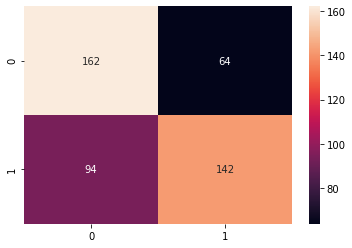

0.6 

Accuracy Score 0.6537
F1 Score 0.598 

Confusion Matrix


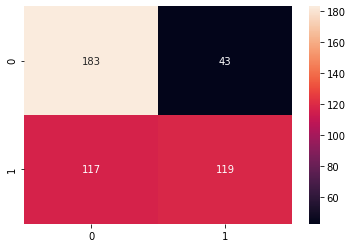

0.7 

Accuracy Score 0.6385
F1 Score 0.5322 

Confusion Matrix


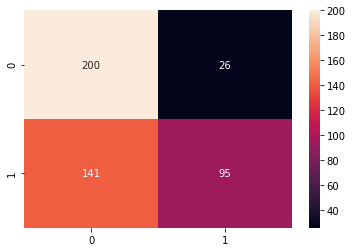

0.8 

Accuracy Score 0.5801
F1 Score 0.3356 

Confusion Matrix


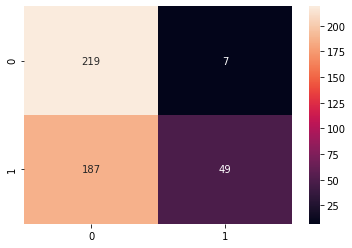

0.9 

Accuracy Score 0.5195
F1 Score 0.112 

Confusion Matrix


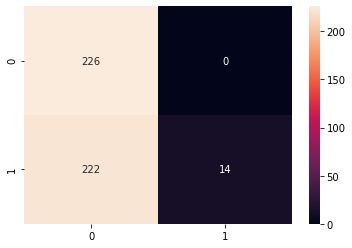

In [201]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [202]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [203]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.61      0.66      0.63        98
           1       0.64      0.58      0.61       101

    accuracy                           0.62       199
   macro avg       0.62      0.62      0.62       199
weighted avg       0.62      0.62      0.62       199
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.75      0.09      0.16        98
           1       0.52      0.97      0.68       101

    accuracy                           0.54       199
   macro avg       0.64      0.53      0.42       199
weighted avg       0.64      0.54      0.43       199
 

